### Testing PAR-2 alleles with a combination of point mutations in the RING domain

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../..')
from src import bounded_mean_1d
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

if not os.path.exists('Figs'):
    os.mkdir('Figs')

### Quantification

In [2]:
df = pd.read_csv('../../../data/par2_nebd_embryos.csv')
df_quantification = pd.read_csv('../../../data/par2_nebd_quantification.csv')
df_quantification_grouped = df_quantification.groupby('EmbryoID')

df_summary = pd.DataFrame()
for i, r in df_quantification_grouped:
    cyt = np.mean(r['Cytoplasmic signal'])
    mem_tot = np.mean(r['Membrane signal'])
    mem_ant = bounded_mean_1d(r['Membrane signal'], [0.4, 0.6])
    mem_post = bounded_mean_1d(r['Membrane signal'], [0.9, 0.1]) 
    ratio_post = mem_post / cyt
    p = {'EmbryoID': i, 'Cyt': cyt, 'Mem_tot': mem_tot, 'Mem_ant': mem_ant, 'Mem_post': mem_post,
        'Ratio post': ratio_post} 
    df_summary = df_summary.append(pd.DataFrame(p, index=[i]))
df = pd.merge(df, df_summary, on='EmbryoID')

# Filter
df = df[df.Line.isin(['lp637', 'nwg240', 'nwg338', 'nwg400', 'nwg407', 'nwg351'])]

# Add genotype column
genotype_dict = {'lp637': 'WT', 'nwg240': 'C56S', 'nwg338': 'L109R', 'nwg400': 'L50R', 'nwg407': 'C56S+L109R', 
                 'nwg351': 'L50R+L109R'}
df['Genotype'] = [genotype_dict[a] for a in df['Line']]

### Figure

In [3]:
def dataplot(data, x, y, ax, order, width=1, linewidth=1, color=None, 
             hue=None, palette=None):
    df_mean = [data[data[x] == o][y].mean() for o in order]
    [ax.hlines(y, i - width/2, i + width/2, zorder=100, color='k', 
               linewidth=2) for i, y in enumerate(df_mean)]
    sns.swarmplot(data=data, x=x, y=y, ax=ax, order=order, linewidth=linewidth, color=color,
                  hue=hue, palette=palette)

/Users/blandt/anaconda3/anaconda3/envs/par2_paper/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/blandt/anaconda3/anaconda3/envs/par2_paper/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/blandt/anaconda3/anaconda3/envs/par2_paper/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/blandt/anaconda3/anaconda3/envs/par2_paper/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


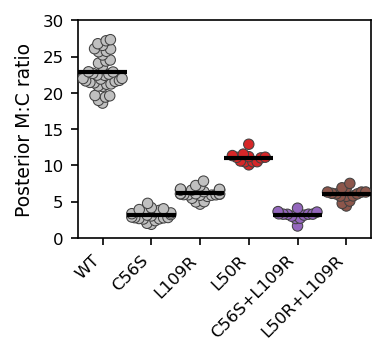

In [4]:
order = ['WT', 'C56S', 'L109R', 'L50R', 'C56S+L109R', 'L50R+L109R']
colors = ['silver', 'silver', 'silver', 'tab:red', 'tab:purple', 'tab:brown']

fig, ax = plt.subplots()
fig.set_size_inches(7, 2.5)

dataplot(data=df[df.RNAi == 'wt'], x='Genotype', y='Ratio post', ax=ax, order=order, linewidth=0.5, palette=colors)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylim(0, 30)
ax.set_ylabel('Posterior M:C ratio', fontsize=9)
fig.set_size_inches(3, 2.5)
fig.subplots_adjust(left=0.25, bottom=0.3)
fig.savefig('Figs/mcr.png', dpi=600, transparent=True)